In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [11]:
def model(x, a, b):
    return x[1] ** 2 *(x[1] ** 2 / 4 - a * x[1] / 3 + b / 2) - x[0] ** 2 *(x[0] ** 2 / 4 - a * x[0] / 3 + b / 2)

In [14]:
x = np.arange(0, 5, 0.1)
y = np.arange(0, 5, 0.1)
X, Y = np.meshgrid(x, y)

a = 6
b = 9
u = (X.ravel(), Y.ravel())

z = model((x, y), a, b)
Z = model(u, a, b)

In [26]:
popt, pcov = optimize.curve_fit(model, (x, y), z, p0=[5.99, 8.99])

/tmp/ipykernel_14341/3342962801.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = optimize.curve_fit(model, (x, y), z, p0=[5.99, 8.99])


In [16]:
popt, pcov = optimize.curve_fit(model, u, Z, p0=[10,8])
popt, pcov

(array([6., 9.]),
 array([[6.78893023e-33, 2.09471226e-32],
        [2.09471226e-32, 6.64942515e-32]]))

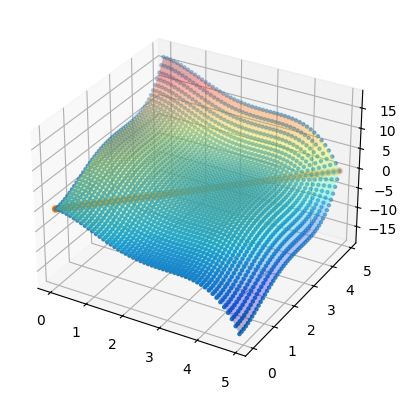

In [18]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.scatter(*u, Z, marker=".")
axe.scatter(x, y)
axe.plot_surface(X, Y, Z.reshape(X.shape), cmap="jet", alpha=0.3)

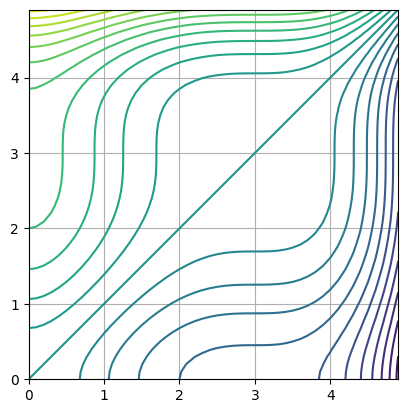

In [19]:
fig, axe = plt.subplots()
axe.contour(X, Y, Z.reshape(X.shape), 30)
axe.grid()
axe.set_aspect("equal")